# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:01:55.203948+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

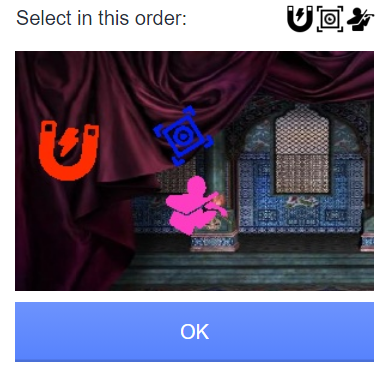

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A text instruction 'Select in this order:' followed by three icons: a red magnet, a blue target, and a pink figure.")
    describe(1, "A background with a curtain and a tiled wall, containing three icons: a red magnet, a blue target, and a pink figure.")
    describe(2, "A blue rectangular button with the text 'OK' in white.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides the selection order for the icons present in Frame 1.")
    relate(1, 2, "Frame 1 requires interaction with icons before proceeding to the 'OK' button in Frame 2.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click the icons in Frame 1 in the order specified in Frame 0 (red magnet, blue target, pink figure), then click the 'OK' button in Frame 2 to complete the task.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    descriptions = ask([frames[1].image], "Describe all the icons (color + details) in the image", "str")
    for description in descriptions:
        element = frames[1].get_element(position='all', details=description)
        element.set_element_as("CLICKABLE")

    frame2 = frames[2]
    ok_button = frame2.get_element(position='up', details='blue button OK')
    ok_button.set_element_as(interactable='NEXT')


In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Describe all the icons (color + details) in the image
Output a list of strings for each image.
You should follow the format `answer(strings=["a", "b", ...])` to answer the question.

'''

Image 0
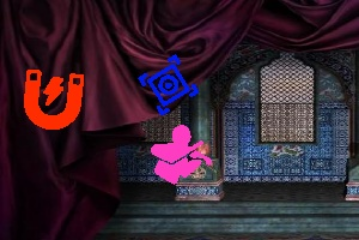

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
answer(strings=["red magnet icon with a lightning bolt in the center", "blue square-shaped icon with decorative elements", "pink angel-like figure holding a small object"])
'''
TIME = 2.0828288458287716
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 541
PROMPT_TOKENS = 507
COMPLETION_TOKENS = 34

---

## Solution Composition

In [ ]:
def stage3(frames):
    # Frame 0 provides the order of icons to click
    order_image = frames[0].image
    order = ask([order_image], "Describe the icons from the left to right", answer_type="str")

    # Frame 1 contains the clickable icons
    icons = [
        frames[1].get_interactable(0), 
        frames[1].get_interactable(1),
        frames[1].get_interactable(2),
    ]

    prompt = f"Assign each icon with the best description:\n{"\n".join([f"({i}) {desc}" for i, desc in enumerate(order)])}\n Each icon must have a unique number, all numbers must be used.\n"

    click_order = ask(
        [icon.image for icon in icons], 
        prompt, 
        answer_type="int"
    )

    # Click the icons in the specified order
    for i in click_order:
        click(icons[i])

    # Frame 2 contains the 'OK' button
    ok_button = frames[2].get_interactable(0)
    click(ok_button)

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Describe the icons from the left to right
Output a list of strings for each image.
You should follow the format `answer(strings=["a", "b", ...])` to answer the question.

'''

In [ ]:
IMAGES = 1

Image 0

In [ ]:
RESPONSE = '''
answer(strings=["magnet", "target", "painter"])
'''
TIME = 1.2242818078957498
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 517
PROMPT_TOKENS = 503
COMPLETION_TOKENS = 14

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Assign each icon with the best description:
(0) magnet
(1) target
(2) painter
 Each icon must have a unique number, all numbers must be used.

Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.

'''

Image 0 Image 1 Image 2
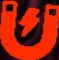
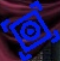
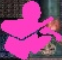

In [ ]:
IMAGES = 3

In [ ]:
RESPONSE = '''
answer(numbers=[0, 1, 2])
'''
TIME = 2.375156676862389
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 969
PROMPT_TOKENS = 957
COMPLETION_TOKENS = 12

---